![title](../images/header.png)

Merging all CEO data (2015-2022/2023)
-------
This notebook merges validated data from different CEO CAFI projects
CEO data must be merged and harmonized using the merge clean ceo data scripts
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

## Enter parameters

In [2]:
#identifier for country 
# COD COG CMR GAB EQG CAF
iso = 'CMR'

In [3]:
# output file all CEO validated data file 
ceo_data_out =  '/home/sepal-user/module_results/esbae/CMR/CMR_all_ceo_2015_2022_2023_clean.csv'

### 1. Read all CEO sample files

##### CEO data from phase I (optional)

In [4]:
ceo1520 = pd.read_csv('/home/sepal-user/CAFI_DDD/CAFI files/CAFI_all_ceo_validation_2015_2020_uniqueID.csv', low_memory=False)
ceo1520.reset_index(inplace=True)
ceo1520['collection']='coll_1520'
phase_I_columns = ceo1520.columns.tolist()
phase_I_columns

['index',
 'plotid_orig',
 'CEO_PLOTID',
 'lon',
 'lat',
 'ISO',
 'CEO_Ref_Code',
 'Ref_FNF_2015',
 'Ref_LCover_2015',
 'Ref_Change_Type_1520',
 'Ref_Year_1520',
 'countDrivers',
 'InfraR',
 'Urb',
 'ArtAg',
 'IndAg',
 'ArtFor',
 'IndFor',
 'ArtMine',
 'IndMine',
 'Other',
 'Source',
 'Ref_Change_Year_1520',
 'Change_Bin_1520',
 'UniqueID',
 'collection']

##### for 2015-2022 CEO sample data

In [4]:
ceo1522 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/CMR_all_ceo_1522_clean.csv')
print(ceo1522.columns.tolist())

['ID', 'plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Ref_Change_LCover_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg',

##### use outputs from merge_clean_ceo_all_data

In [5]:
# use QC outputs if desired
ceo2023 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/CMR_all_ceo_2023_clean_qc.csv')
print(ceo2023.columns.tolist())

['ID', 'ID.1', 'plotid', 'sampleid', 'lon', 'lat', 'TNT_stratum', 'sample_geom', 'Ref_FNF_2022', 'Ref_Regeneration', 'Ref_Change_2023', 'Ref_Change_Type_2023', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_NFtype_2022', 'Ref_Ftype_2022', 'collection', 'interpreted', 'Ref_LCover_2022', 'Ref_Change_Year_2023', 'Ref_Change_LCover_2023', 'Def2023', 'Deg2023', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg', 'Swamp_Deg', 'Gallery_Deg', 'Plantation_Deg', 'Woodland_Deg', 'DensFor_Stable', 'DensDryFor_Stable', 'SecFor_Stable', 'DryOpenFor_Stable'

### end of parameters

In [6]:
#ceo1520 = ceo1520.loc[ceo1520['ISO'] == iso]

In [7]:
#len(ceo1520)

In [8]:
len(ceo1522)

6733

In [9]:
len(ceo2023)

3121

### merge all

In [10]:
#data_frames =[ceo1520, ceo1522, ceo2023]
data_frames =[ceo1522, ceo2023]

# Source file names corresponding to each data frame
#source_file = ['ceo_1520','ceo_1522', 'ceo_2023']  # Replace with your file names
source_file = ['ceo_1522', 'ceo_2023']  # Replace with your file names

# Merge data frames and add a new column for source file name
merged_ceo = pd.concat([df.assign(sampling=source_file) for df, source_file in zip(data_frames, source_file)], ignore_index=True)

In [11]:
merged_ceo.head()

,ID,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_Stable,DensDryFor_Stable,SecFor_Stable,DryOpenFor_Stable,Mangrove_Stable,Swamp_Stable,Gallery_Stable,Plantation_Stable,Woodland_Stable,ISO,sampling,ID.1,TNT_stratum,Ref_FNF_2022,Ref_Change_2023,Ref_Change_Type_2023,Ref_NFtype_2022,Ref_Ftype_2022,Ref_LCover_2022,Ref_Change_Year_2023,Ref_Change_LCover_2023,Def2023,Deg2023,interpreted_qc
0,0,3195,3195.0,3195,11.966747,7.395009,POINT(11.966747 7.395009),1.0,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,4.0,coll_1522_1,1,4.0,Stable,Stable_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,382369,382369.0,382369,13.462191,4.616583,POINT(13.462191 4.616583),1.0,NaN,1.0,Deg,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,2022.0,NaN,1.0,coll_1522_1,1,1.0,Deg2022,Deg_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,381976,381976.0,381976,13.326331,4.472166,POINT(13.326331 4.472166),1.0,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,381269,381269.0,381269,13.454098,4.943217,POINT(13.454098 4.943217),1.0,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,379902,379902.0,379902,13.021454,4.519678,POINT(13.021454 4.519678),1.0,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# this might take some time
unique_check = merged_ceo['sample_geom'].nunique() == len(merged_ceo['sample_geom'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


In [13]:
#if they are not unique...
#merged_ceo = merged_ceo.drop_duplicates(subset='sample_geom', keep='first', inplace=True)

In [14]:
len(merged_ceo)

9854

In [15]:
merged_ceo['collection'].value_counts(dropna=False)

collection
coll_1522_2    6235
coll_2023_6     813
coll_2023_4     709
coll_1522_1     498
coll_2023_2     450
coll_2023_1     442
coll_2023_5     274
QC_2023         260
coll_2023_3     173
Name: count, dtype: int64

In [16]:
print(merged_ceo.columns.tolist())

['ID', 'plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Ref_Change_LCover_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg',

### 2. Combine and consolidate columns

In [17]:
#Ref_LCover will be blank where LCover is NF in 2022, because it could have been forest in 2015
# Create a new column by concatenating Ref_LCover, Ref_LCover_2015, and Ref_FType_2022
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2015'].fillna(merged_ceo['Ref_Ftype_2022']).astype(float).fillna(0).astype(int).astype(str)
merged_ceo['Ref_LCover_2015'].value_counts(dropna=False)

Ref_LCover_2015
12    1906
0     1589
3     1290
1     1259
9     1218
11     857
15     438
13     295
4      248
16     227
17     148
2      126
8      110
10      56
14      41
7       30
18      16
Name: count, dtype: int64

In [18]:
# Create the new 'Ref_FNF' column
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2015'].astype(float)

condition = merged_ceo['Ref_LCover_2015'] < 12

# Apply the condition using numpy.where
merged_ceo['Ref_FNF_2015'] = np.where(condition, 1, 
                                             np.where(merged_ceo['Ref_LCover_2015'].notna(), 0, np.nan))
merged_ceo['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1.0    6783
0.0    3071
Name: count, dtype: int64

In [19]:
merged_ceo['Ref_FNF_2015']=merged_ceo['Ref_FNF_2015'].fillna(0).astype(int).astype(str)
merged_ceo['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1    6783
0    3071
Name: count, dtype: int64

In [20]:
merged_ceo['Woodland_Def'].value_counts(dropna=False)

Woodland_Def
0    9850
1       4
Name: count, dtype: int64

In [21]:
#merged_ceo['Ref_Change_Type_1523'] = merged_ceo['Ref_Change_Type_1520'].fillna(merged_ceo['Ref_Change_Type_1522']).fillna(merged_ceo['Ref_Change_Type_2023'])
merged_ceo['Ref_Change_Type_1523'] = merged_ceo['Ref_Change_Type_1522'].fillna(merged_ceo['Ref_Change_Type_2023'])

# Set rows where Ref_Change_Type_2023 is 'NF' to NaN
merged_ceo.loc[merged_ceo['Ref_Change_Type_2023'] == 'NF', 'Ref_Change_Type'] = pd.NA

# Print the value counts
print(merged_ceo['Ref_Change_Type_1523'].value_counts(dropna=False))

Ref_Change_Type_1523
Stable    4663
NF        4660
Deg        318
Def        213
Name: count, dtype: int64


In [22]:
#merged_ceo['Ref_Change_Year_1523'] = merged_ceo['Ref_Change_Year_1520'].fillna(merged_ceo['Ref_Change_Year_1522']).fillna(merged_ceo['Ref_Change_Year_2023'])
merged_ceo['Ref_Change_Year_1523'] = merged_ceo['Ref_Change_Year_1522'].fillna(merged_ceo['Ref_Change_Year_2023'])

merged_ceo['Ref_Change_Year_1523'].value_counts(dropna=False)

Ref_Change_Year_1523
Stable     4663
NF         4660
Deg2021      74
Deg2023      61
Deg2022      38
Deg2020      36
Deg2019      31
Def2022      30
Def2023      30
Deg2017      29
Def2016      29
Def2017      29
Deg2016      27
Def2019      26
Def2020      25
Def2018      23
Deg2018      22
Def2021      21
Name: count, dtype: int64

In [23]:
pd.pivot_table(merged_ceo,values='plotid',index=['Ref_Change_Type_1523'],columns=['collection'],aggfunc="count",margins=True,
                             margins_name='Total')

collection,QC_2023,coll_1522_1,coll_1522_2,coll_2023_1,coll_2023_2,coll_2023_3,coll_2023_4,coll_2023_5,coll_2023_6,Total
Ref_Change_Type_1523,,,,,,,,,,
Def,9.0,7.0,176.0,NaN,1.0,3.0,2.0,5.0,10.0,213
Deg,4.0,23.0,234.0,NaN,13.0,2.0,25.0,3.0,14.0,318
NF,117.0,164.0,2907.0,188.0,187.0,140.0,230.0,212.0,515.0,4660
Stable,130.0,304.0,2918.0,254.0,249.0,28.0,452.0,54.0,274.0,4663
Total,260.0,498.0,6235.0,442.0,450.0,173.0,709.0,274.0,813.0,9854


In [24]:
merged_ceo['ISO'] = iso

In [25]:
merged_ceo_column_names = merged_ceo.columns.tolist()
# Print the list of column names
merged_ceo_column_names

['ID',
 'plotid',
 'point_id',
 'sampleid',
 'lon',
 'lat',
 'sample_geom',
 'Ref_FNF_2015',
 'Ref_Regeneration',
 'Ref_Change_1522',
 'Ref_Change_Type_1522',
 'ArtFor',
 'ArtMine',
 'InfraR',
 'Urb',
 'IndFor',
 'Other',
 'Other_Desc',
 'IndMine',
 'IndAg',
 'ArtAg',
 'Ref_Year_1522',
 'Ref_NFtype_2015',
 'Ref_Ftype_2015',
 'collection',
 'interpreted',
 'Ref_LCover_2015',
 'Ref_Change_Year_1522',
 'Ref_Change_LCover_1522',
 'Def2016',
 'Def2017',
 'Def2018',
 'Def2019',
 'Def2020',
 'Def2021',
 'Def2022',
 'Deg2016',
 'Deg2017',
 'Deg2018',
 'Deg2019',
 'Deg2020',
 'Deg2021',
 'Deg2022',
 'Defall',
 'Degall',
 'Stable',
 'NF',
 'DensFor',
 'DensDryFor',
 'SecFor',
 'DryOpenFor',
 'Mangrove',
 'Swamp',
 'Gallery',
 'Plantation',
 'Woodland',
 'Shrubland',
 'Grassland',
 'Aquatic',
 'Bare',
 'Cultivated',
 'Builtup',
 'Water',
 'DensFor_Def',
 'DensDryFor_Def',
 'SecFor_Def',
 'DryOpenFor_Def',
 'Mangrove_Def',
 'Swamp_Def',
 'Gallery_Def',
 'Plantation_Def',
 'Woodland_Def',
 'DensFor

In [27]:
merged_ceo = merged_ceo.drop(columns=['ID.1'])

### 3. plot change points by year

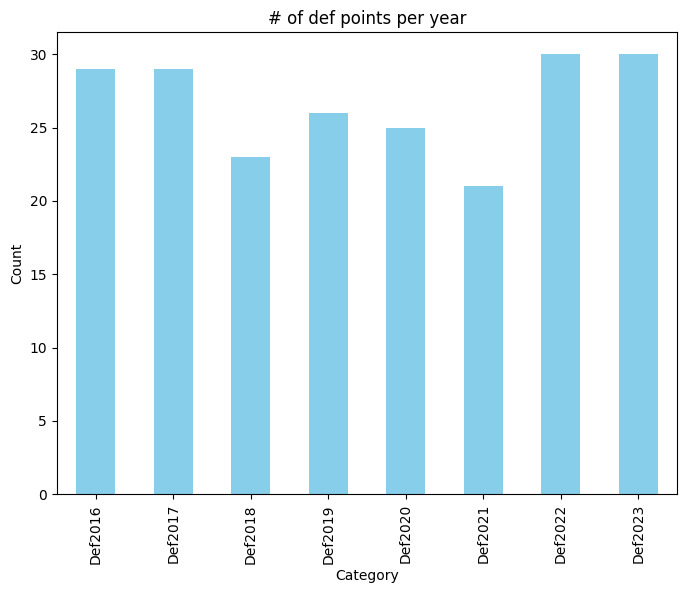

In [28]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Def2023']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo[merged_ceo['Ref_Change_Year_1523'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1523'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

In [33]:
merged_ceo['Ref_Change_Year_1523'].value_counts()

Ref_Change_Year_1523
Stable     4663
NF         4660
Deg2021      74
Deg2023      61
Deg2022      38
Deg2020      36
Deg2019      31
Def2022      30
Def2023      30
Deg2017      29
Def2016      29
Def2017      29
Deg2016      27
Def2019      26
Def2020      25
Def2018      23
Deg2018      22
Def2021      21
Name: count, dtype: int64

##### plot degradation points by year

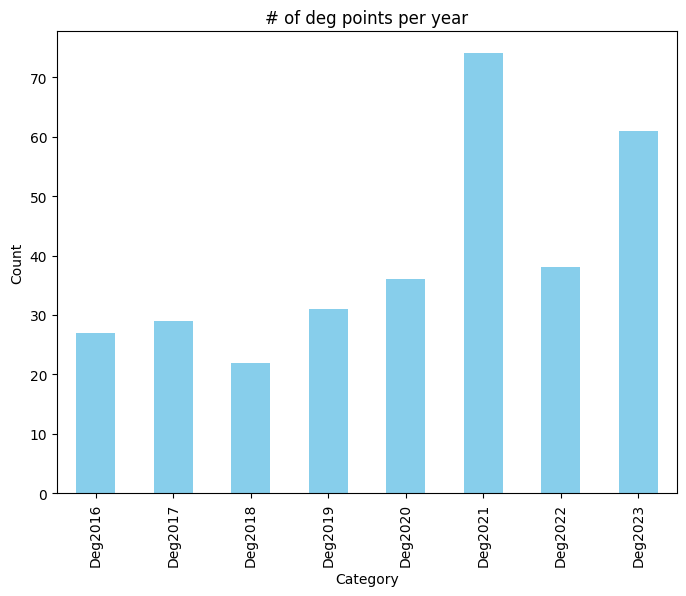

In [29]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','Deg2023']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo[merged_ceo['Ref_Change_Year_1523'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1523'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [30]:
merged_ceo.head()

,ID,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_Stable,DensDryFor_Stable,SecFor_Stable,DryOpenFor_Stable,Mangrove_Stable,Swamp_Stable,Gallery_Stable,Plantation_Stable,Woodland_Stable,ISO,sampling,TNT_stratum,Ref_FNF_2022,Ref_Change_2023,Ref_Change_Type_2023,Ref_NFtype_2022,Ref_Ftype_2022,Ref_LCover_2022,Ref_Change_Year_2023,Ref_Change_LCover_2023,Def2023,Deg2023,interpreted_qc,Ref_Change_Type_1523,Ref_Change_Year_1523
0,0,3195,3195.0,3195,11.966747,7.395009,POINT(11.966747 7.395009),1,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,4.0,coll_1522_1,1,4.0,Stable,Stable_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable,Stable
1,1,382369,382369.0,382369,13.462191,4.616583,POINT(13.462191 4.616583),1,NaN,1.0,Deg,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,2022.0,NaN,1.0,coll_1522_1,1,1.0,Deg2022,Deg_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deg,Deg2022
2,2,381976,381976.0,381976,13.326331,4.472166,POINT(13.326331 4.472166),1,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable,Stable
3,3,381269,381269.0,381269,13.454098,4.943217,POINT(13.454098 4.943217),1,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable,Stable
4,4,379902,379902.0,379902,13.021454,4.519678,POINT(13.021454 4.519678),1,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable,Stable


### 4. export ceo data to one csv file

In [31]:
merged_ceo.to_csv(ceo_data_out,index_label='UID')